In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import random
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")


<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams.update({"font.size": 14})

<IPython.core.display.Javascript object>

In [9]:
months = np.random.randint(0, 121, 1000)
customer_id = ["customer_id_" + str(i) for i in range(len(months))]
df = pd.DataFrame({"customer_id": customer_id, "months": months})
df.head(10)

,customer_id,months
0,customer_id_0,50
1,customer_id_1,99
2,customer_id_2,45
3,customer_id_3,101
4,customer_id_4,13
5,customer_id_5,21
6,customer_id_6,56
7,customer_id_7,115
8,customer_id_8,26
9,customer_id_9,83


<IPython.core.display.Javascript object>

#### Fixed width binning

In [10]:
bin_width = 18.0

<IPython.core.display.Javascript object>

``` 
Months Range : Bin
---------------
00 to 18  : 1
19 to 36  : 2
37 to 54  : 3
.............
.............
```

In [11]:
df["months_bin_floor"] = np.floor(df["months"] / bin_width).astype("Int64")
df["months_bin_ceil"] = np.ceil(df["months"] / bin_width).astype("Int64")
df.head(10)

,customer_id,months,months_bin_floor,months_bin_ceil
0,customer_id_0,50,2,3
1,customer_id_1,99,5,6
2,customer_id_2,45,2,3
3,customer_id_3,101,5,6
4,customer_id_4,13,0,1
5,customer_id_5,21,1,2
6,customer_id_6,56,3,4
7,customer_id_7,115,6,7
8,customer_id_8,26,1,2
9,customer_id_9,83,4,5


<IPython.core.display.Javascript object>

Text(0, 0.5, '# of customers')

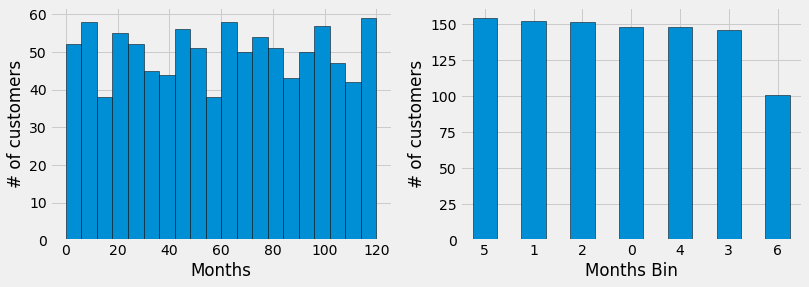

<IPython.core.display.Javascript object>

In [12]:
plt.subplot(1, 2, 1)
plt.hist(df["months"], bins=20, edgecolor="black")
plt.xlabel("Months")
plt.ylabel("# of customers")
plt.subplot(1, 2, 2)
df["months_bin_floor"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("Months Bin")
plt.ylabel("# of customers")


#### Fixed number of bins


In [13]:
nbins = 5

<IPython.core.display.Javascript object>

In [18]:
print("min: ", df["months"].min())
print("max: ", df["months"].max())

min:  0
max:  120


<IPython.core.display.Javascript object>

In [14]:
# width = (max - min )/ nbins
bin_width = round((df["months"].max() - df["months"].min()) / nbins)
print("bin width: ", bin_width)

bin width:  24


<IPython.core.display.Javascript object>

In [16]:
df["months_bin_floor"] = np.floor(df["months"] / bin_width).astype("Int64")
df["months_bin_ceil"] = np.ceil(df["months"] / bin_width).astype("Int64")

df["months_bin_cut"] = pd.cut(df["months"], bins=nbins, labels=False)
df["months_bin_label"] = pd.cut(df["months"], bins=nbins)
df["months_bin_label_2"] = pd.cut(df["months"], bins=[0, 24, 48, 72, 96, 120])

df.head(10)

,customer_id,months,months_bin_floor,months_bin_ceil,months_bin_cut,months_bin_label,months_bin_label_2
0,customer_id_0,50,2,3,2,"(48.0, 72.0]","(48, 72]"
1,customer_id_1,99,4,5,4,"(96.0, 120.0]","(96, 120]"
2,customer_id_2,45,1,2,1,"(24.0, 48.0]","(24, 48]"
3,customer_id_3,101,4,5,4,"(96.0, 120.0]","(96, 120]"
4,customer_id_4,13,0,1,0,"(-0.12, 24.0]","(0, 24]"
5,customer_id_5,21,0,1,0,"(-0.12, 24.0]","(0, 24]"
6,customer_id_6,56,2,3,2,"(48.0, 72.0]","(48, 72]"
7,customer_id_7,115,4,5,4,"(96.0, 120.0]","(96, 120]"
8,customer_id_8,26,1,2,1,"(24.0, 48.0]","(24, 48]"
9,customer_id_9,83,3,4,3,"(72.0, 96.0]","(72, 96]"


<IPython.core.display.Javascript object>

Text(0, 0.5, '# of customers')

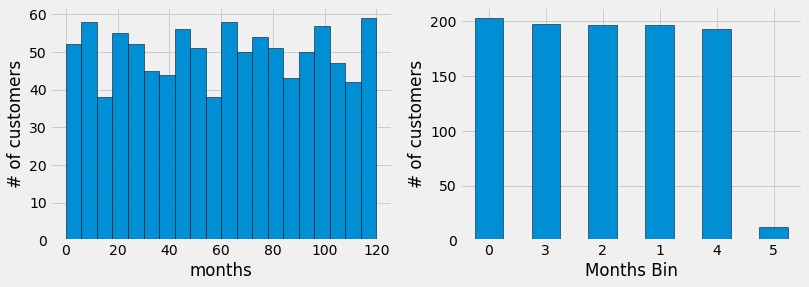

<IPython.core.display.Javascript object>

In [17]:
plt.subplot(1, 2, 1)
plt.hist(df["months"], bins=20, edgecolor="black")
plt.xlabel("months")
plt.ylabel("# of customers")
plt.subplot(1, 2, 2)
df["months_bin_floor"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("Months Bin")
plt.ylabel("# of customers")
# _ = plt.hist(df["Age_bin_ceil"], edgecolor="black")
# plt.grid()